In [1]:
import numpy as np
import numpy_indexed as npi
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
#from pyppca import ppca
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ExpSineSquared
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model._glm.glm import PoissonRegressor, GammaRegressor, TweedieRegressor
from sklearn.linear_model._coordinate_descent import Lasso
from sklearn.model_selection import KFold
#from chord import Chord
import itertools
#import holoviews as hv
#from bokeh.sampledata.les_mis import data
#from holoviews import opts, dim
import random
from sklearn.metrics.pairwise import rbf_kernel
from scipy.special import gamma,psi
from scipy import ndimage
from scipy.linalg import det
from numpy import pi
from sklearn.neighbors import NearestNeighbors
from scipy.stats import entropy
from sklearn.model_selection import cross_validate
#from hyppo.independence import Hsic
from numpy.random import randint
import multiprocessing
import sys
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import linear_model
#from RegscorePy import *
from sklearn.decomposition import PCA
#import plotly.express as px
from matplotlib.dates import date2num
import pycountry
import pycountry_convert as pc
#from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from methods.feature_permutation import FeaturePermutation
from methods.partial_dependency import PDP
from methods.shap import Shap
import dataframe_image as dfi
import matplotlib.gridspec as gridspec

In [2]:
from __future__ import division
from scipy.stats import gamma

In [3]:
pd.set_option('display.max_columns', None)  

In [4]:
db = pd.read_csv("/Users/Michele/Desktop/ISP/projects/deepcube/uc2_data_preparation/Global_Disaster_Database_V3.csv")

In [5]:
db.head()

,iso3,Type,term,start_date,end_date,area,IDP,LST_Max,LST_Mean,Surf_Pressure_Min,Wind_Speed_Max,Wind_Speed_Mean,PREP_Mean,PREP_Max,NDVI_Mean,gHM,Pop_density,awi_mean,awi_median,awi_min,awi_max,awi_std,rwi_mean,rwi_median,rwi_min,rwi_max,rwi_std,Elevation_Max,Elevation_Mean,Slope_Max,Slope_Mean,Agricultural land (% of land area),CO2 emissions (kg per PPP $ of GDP),Cereal yield (kg per hectare),"Birth rate, crude (per 1,000 people)",Land area (sq. km),Land under cereal production (hectares),Net official development assistance received (constant 2018 US$),"Population, total",Rural population (% of total population),Renewable energy consumption (% of total final energy consumption),Merchandise trade (% of GDP),"Population, total.1",Population growth (annual %),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),People using at least basic sanitation services (% of population),People using at least basic drinking water services (% of population),"PPP conversion factor, private consumption (LCU per international $)","Probability of dying among children ages 5-9 years (per 1,000)","Renewable internal freshwater resources, total (billion cubic meters)",Secure Internet servers (per 1 million people)
0,TCD,Flood,Displaced,2020-07-31,2020-08-08,1.627714e+00,2090,17155.0,16908.000000,NaN,NaN,NaN,NaN,NaN,4465.691823,0.406785,28.665456,78.381497,88.263769,0.101694,113.238492,30.388381,-0.259848,-0.255,-1.177,0.831,0.282848,312.0,288.091565,0.229978,0.051657,39.896760,0.042570,854.300000,42.43025,1259200.0,3.359525e+06,7.351275e+08,15485777.4,76.9214,85.302633,47.710021,15485777.4,3.038086,12.298108,1.765598,11.608068,45.464283,238.672305,15.95,15.000,0.672645
1,TUN,Flood,Sheltered,2018-09-18,2018-09-27,5.695948e-06,3280,17270.0,17061.000000,73411.828125,12.092920,11.056374,0.059865,0.215070,4572.261459,0.701772,308.567627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,0.425770,62.626588,0.243085,1425.933333,17.76700,155360.0,1.231776e+06,8.466850e+08,11563184.4,31.0490,12.034567,87.564201,11563184.4,1.111080,74.428324,5.900000,95.313465,96.505655,0.783277,1.60,4.195,244.475661
2,CAN,Storm,Displaced,2020-10-02,2020-10-12,6.930789e-04,100,16843.0,16552.400000,NaN,NaN,NaN,NaN,NaN,5421.905390,0.256967,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Flood,Multiple/Other,2019-10-26,2019-11-04,2.691626e-08,22,16629.0,16455.000000,50967.988281,15.951382,14.360521,0.049725,0.273439,4408.380707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LKA,Storm,Destroyed Housing,2018-11-13,2019-01-02,7.201772e-08,7,16680.0,16208.761905,50008.000000,19.566298,17.497125,0.025011,0.276316,3943.930756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.825306,0.082262,3551.000000,15.96125,61875.6,1.060793e+06,1.706450e+08,21607800.0,81.5062,50.548800,36.383555,21607800.0,0.885220,349.214463,2.019213,93.068685,91.792338,55.576374,0.85,52.800,300.275160


In [6]:
len(db)

3678

In [7]:
db = db.drop(['area', 'LST_Max','LST_Mean', 'Wind_Speed_Mean', 
              'PREP_Mean', 'Pop_density', 'awi_median', 'awi_mean', 'awi_min', 
              'awi_std', 'rwi_mean', 'rwi_median', 'rwi_min', 'rwi_max', 'rwi_std', 'Land area (sq. km)',
              'Secure Internet servers (per 1 million people)', 'Renewable internal freshwater resources, total (billion cubic meters)', 
              'PPP conversion factor, private consumption (LCU per international $)',
              'Probability of dying among children ages 5-9 years (per 1,000)',
              'People using at least basic sanitation services (% of population)', 
              'Slope_Max', 'Slope_Mean', 'Cereal yield (kg per hectare)',
              'Birth rate, crude (per 1,000 people)','Surf_Pressure_Min',
              'Net official development assistance received (constant 2018 US$)',
              'Population, total.1','Elevation_Max', 'Population growth (annual %)',
              'CO2 emissions (kg per PPP $ of GDP)', 'Rural population (% of total population)',
              'Renewable energy consumption (% of total final energy consumption)',
              'People using at least basic drinking water services (% of population)',
              'Land under cereal production (hectares)', 'Population, total', 'Merchandise trade (% of GDP)',
              'Population density (people per sq. km of land area)'], axis=1)

In [8]:
db.columns

Index(['iso3', 'Type', 'term', 'start_date', 'end_date', 'IDP',
       'Wind_Speed_Max', 'PREP_Max', 'NDVI_Mean', 'gHM', 'awi_max',
       'Elevation_Mean', 'Agricultural land (% of land area)',
       'Adjusted savings: education expenditure (% of GNI)'],
      dtype='object')

In [9]:
db = db.dropna()

In [10]:
len(db)

1909

In [13]:
db["Wind_Speed_Max"].max()

29.09379835615718

In [15]:
db["PREP_Max"].max()

0.5379321575164795

In [16]:
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

def country_flag(df):
    if df['iso3'] in list_alpha_3:
        return pycountry.countries.get(alpha_3=df['iso3']).name
    else:
        return 'Invalid Code'
    
def country_to_continent(df):
    try:
        country = pycountry.countries.get(alpha_3=df["iso3"])
        country_alpha2 = country.alpha_2
        try:
            country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            return country_continent_name
        except KeyError:
            return "None"
    except AttributeError :
        return "None"

In [17]:
db["country_name"] = db.apply(country_flag, axis = 1)

In [18]:
db["continent"] = db.apply(country_to_continent, axis = 1)

In [19]:
db[db["continent"]=='None']

,iso3,Type,term,start_date,end_date,IDP,Wind_Speed_Max,PREP_Max,NDVI_Mean,gHM,awi_max,Elevation_Mean,Agricultural land (% of land area),Adjusted savings: education expenditure (% of GNI),country_name,continent
2140,TLS,Flood,Destroyed Housing,2020-03-09,2020-03-22,1064,23.585803,0.235577,3990.273264,0.536168,242.03827,437.567963,25.554808,3.168045,Timor-Leste,None
3351,TLS,Flood,Evacuated,2020-01-18,2020-01-27,77,17.872770,0.212000,3901.282932,0.536168,242.03827,437.567963,25.554808,3.168045,Timor-Leste,None


In [20]:
db.loc[2140,'continent'] ='Asia'

In [21]:
db.loc[3351,'continent'] ='Asia'

In [22]:
db[db["continent"]=='None']

,iso3,Type,term,start_date,end_date,IDP,Wind_Speed_Max,PREP_Max,NDVI_Mean,gHM,awi_max,Elevation_Mean,Agricultural land (% of land area),Adjusted savings: education expenditure (% of GNI),country_name,continent


In [23]:
db["continent"].unique()

array(['Asia', 'South America', 'Africa', 'North America'], dtype=object)

In [24]:
db["year"] = pd.to_datetime(db['start_date']).dt.year

In [25]:
db["year"].value_counts()

2019    889
2018    591
2020    398
2017     23
2016      8
Name: year, dtype: int64

In [26]:
years = pd.to_datetime(db['start_date']).dt.year

In [27]:
startd, idpt = list(zip(*sorted(zip(years, db["IDP"]))))

In [28]:
precmax_yr = [db[db["year"]==i]["PREP_Max"] for i in sorted(db["year"].unique())]

In [29]:
idp_yr = [db[db["year"]==i]["IDP"] for i in sorted(db["year"].unique())]

In [30]:
db["Type"].unique()

array(['Wet mass movement', 'Flood', 'Storm'], dtype=object)

In [31]:
asia = []
africa = []
nam = []
sam = []

for i in db["Type"].unique():
    idpdis = db[db["Type"]==i].groupby(['continent'])['IDP'].agg('sum')
    asia.append(idpdis["Asia"])
    africa.append(idpdis["Africa"])
    nam.append(idpdis["North America"])
    sam.append(idpdis["South America"])

In [32]:
db[db["Type"]=='Wet mass movement'].groupby(['continent'])['IDP'].agg('sum')

continent
Africa            15884
Asia             105645
North America     10339
South America     13488
Name: IDP, dtype: int64

## Set default parameters for all plots

In [28]:
font_size = 18
plt.style.use('seaborn')
# plt.rc('font', size=font_size)        # default text size (won't work)
plt.rc('axes', titlesize=font_size)   # title
plt.rc('axes', labelsize=font_size)   # x and y labels
plt.rc('xtick', labelsize=font_size)  # x tick labels
plt.rc('ytick', labelsize=font_size)  # y tick labels
plt.rc('legend', fontsize=font_size)  # legend
plt.rc('lines', markersize=12)        # marker size

In [29]:
! pwd

/Users/Michele/Desktop/ISP/projects/deepcube/uc3/xai4dc_globalstudy


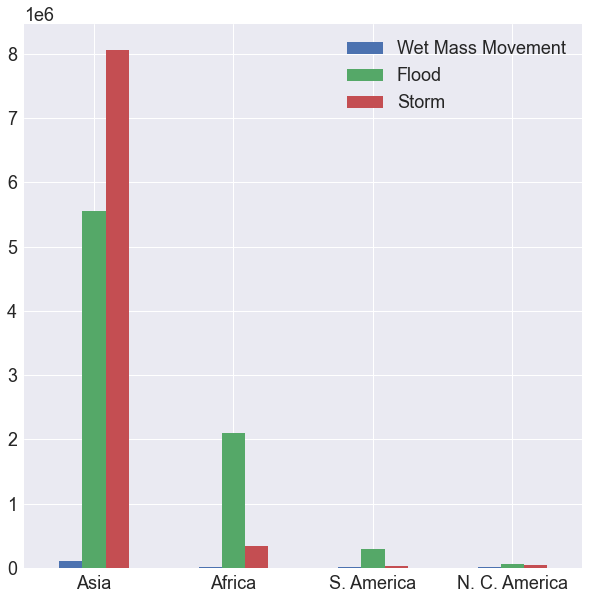

In [32]:
data = [["Asia"]+asia,
        ["Africa"]+africa,
        ["S. America"]+sam,
        ["N. C. America"]+nam
       ]

df = pd.DataFrame(data,columns=["","Wet Mass Movement","Flood","Storm"])
df.plot(x="", y=["Wet Mass Movement","Flood","Storm"], kind="bar", figsize=(10,10), rot=0)
plt.savefig("./agu_plots/distr_per_continent.pdf")
plt.show()

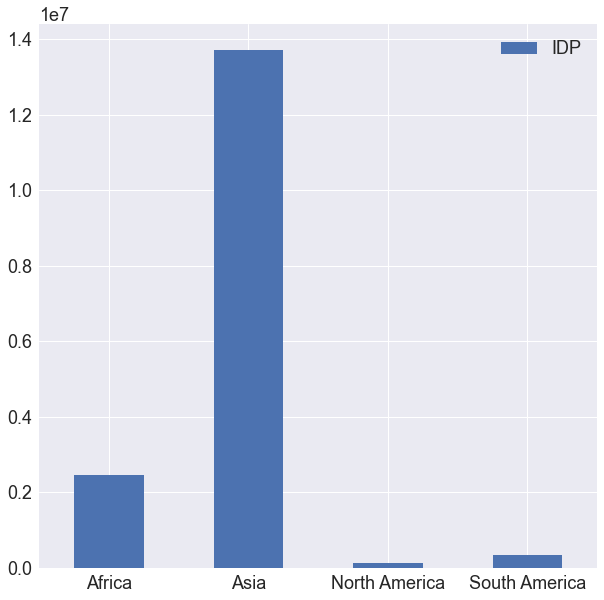

In [33]:
df = pd.DataFrame({'':list(db.groupby(['continent'])['IDP'].agg('sum').index.values), 'IDP':list(db.groupby(['continent'])['IDP'].agg('sum').values)})
df.plot.bar(x='', y='IDP', rot=0, figsize=(10,10))
plt.savefig("./agu_plots/idp_per_continent.pdf")
plt.show()

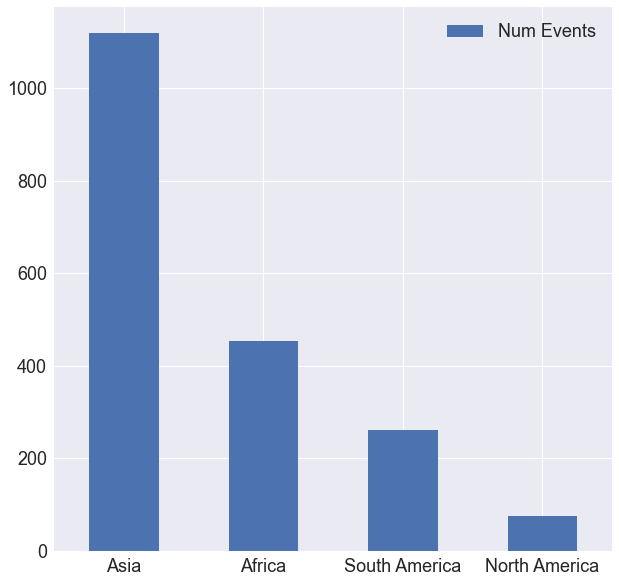

In [34]:
df = pd.DataFrame({'':list(db["continent"].value_counts().index.values), 'Num Events':list(db["continent"].value_counts().values)})
df.plot.bar(x='', y='Num Events', figsize=(10,10), rot=0)
plt.savefig("./agu_plots/events_per_continent.pdf")
plt.show()

Corr =  0.9705135476731861


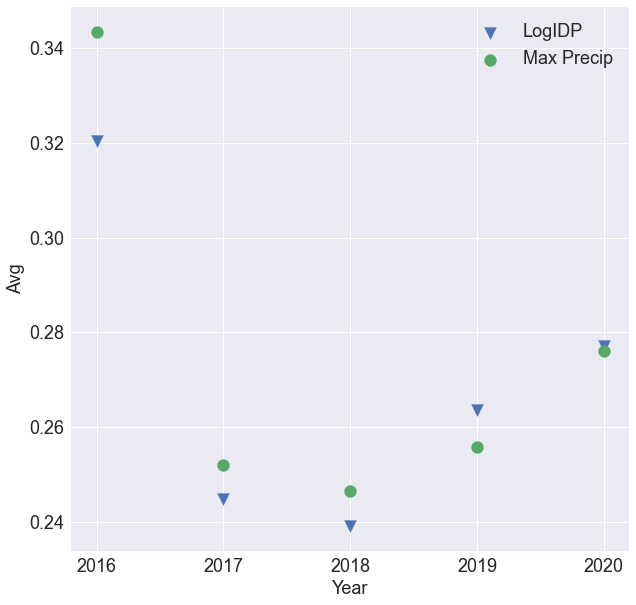

In [35]:
dbp = db.dropna(subset=["PREP_Max", "IDP"])
maxidp_yr = [np.mean(dbp[dbp["year"]==i]["IDP"]) for i in sorted(dbp["year"].unique())]
maxprec_yr = [np.mean(dbp[dbp["year"]==i]["PREP_Max"]) for i in sorted(dbp["year"].unique())]
logmaxidp_yr = np.log10(np.array(maxidp_yr))/15
print("Corr = ", np.corrcoef(maxprec_yr, logmaxidp_yr)[0,1])

plt.figure(figsize=(10,10))
plt.scatter(range(1,len(maxprec_yr)+1), logmaxidp_yr, marker = "v", label='LogIDP')
plt.scatter(range(1,len(maxprec_yr)+1), maxprec_yr, label='Max Precip')
plt.xticks(list(range(1,len(maxprec_yr)+1)), sorted(dbp["year"].unique()))
plt.xlabel("Year")
plt.ylabel("Avg")
plt.legend(loc='upper right')
plt.savefig("./agu_plots/avg_prep_idp.pdf")

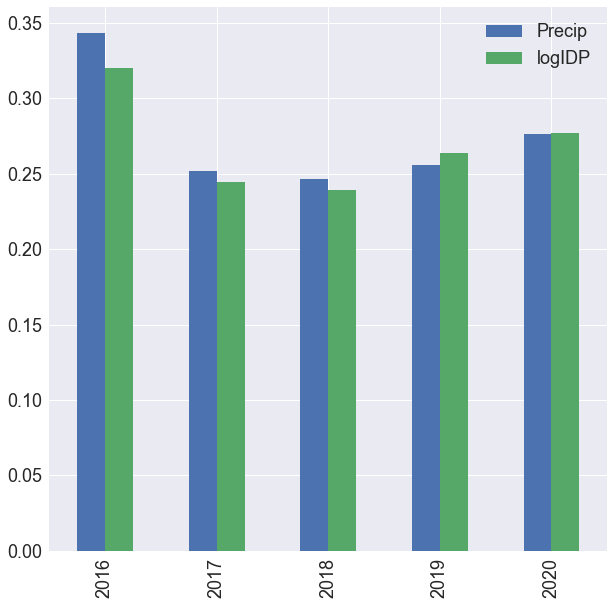

In [36]:
yr = [2016, 2017, 2018, 2019, 2020]
data = []
for i in range(5):
    data.append([yr[i], maxprec_yr[i], logmaxidp_yr[i]])

df = pd.DataFrame(data,columns=["", "Precip", "logIDP"])
df.plot(x="", y=["Precip","logIDP"], kind="bar",figsize=(10,10))
plt.savefig("./agu_plots/idp_precip.pdf")
plt.show()

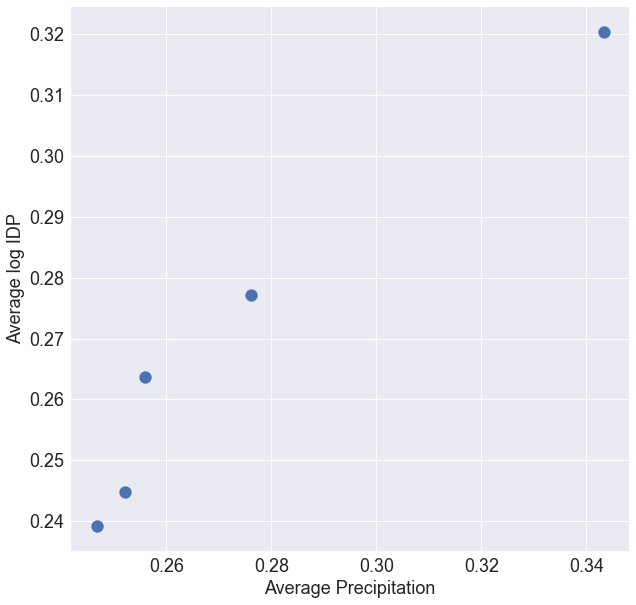

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(maxprec_yr, logmaxidp_yr)
plt.xlabel("Average Precipitation")
plt.ylabel("Average log IDP")
plt.savefig("./agu_plots/scatter_prep_idp.pdf")

## A short of bootstrap to see how many times the corr. coef. is larger than 0.97

In [38]:
%%time
trials = 1000
cc = np.zeros(trials)
for i in range(trials):
    dbp = db.dropna(subset=["PREP_Max", "IDP"])
    dbp["ran"] = np.random.permutation(dbp["PREP_Max"].values)
    maxidp_yr = [np.mean(dbp[dbp["year"]==i]["IDP"]) for i in sorted(dbp["year"].unique())]
    maxprec_yr = [np.mean(dbp[dbp["year"]==i]["ran"]) for i in sorted(dbp["year"].unique())]
    logmaxidp_yr = np.log10(np.array(maxidp_yr)) / 15
    cc[i] = np.corrcoef(maxprec_yr, logmaxidp_yr)[0,1]
    # print("Corr =", cc)

print('Avg CC', np.sum(cc) / trials)
print('C >= 0.97', np.sum([cc >= 0.97]))

Avg CC -0.02952876314497307
C >= 0.97 4
CPU times: user 11 s, sys: 131 ms, total: 11.1 s
Wall time: 12.3 s


In [33]:
db1 = db.dropna()

In [34]:
len(db1)

1909

In [35]:
db1["logIDP"] = np.log10(db1.IDP)

In [36]:
db1.columns

Index(['iso3', 'Type', 'term', 'start_date', 'end_date', 'IDP',
       'Wind_Speed_Max', 'PREP_Max', 'NDVI_Mean', 'gHM', 'awi_max',
       'Elevation_Mean', 'Agricultural land (% of land area)',
       'Adjusted savings: education expenditure (% of GNI)', 'country_name',
       'continent', 'year', 'logIDP'],
      dtype='object')

In [37]:
db2 = db1.drop(['IDP', 'iso3', 'Type', 'term', 'start_date', 'end_date', 'country_name', 'continent', 'year'], axis=1)

In [38]:
db2.columns

Index(['Wind_Speed_Max', 'PREP_Max', 'NDVI_Mean', 'gHM', 'awi_max',
       'Elevation_Mean', 'Agricultural land (% of land area)',
       'Adjusted savings: education expenditure (% of GNI)', 'logIDP'],
      dtype='object')

In [39]:
db2.columns =['WS', 'Precip', 'NDVI', 'gHM','AWI', 'Elev', 'Agr_Land', 'Edu_exp', 'IDP']

In [40]:
list(zip(['Wind_Speed_Max', 'PREP_Max', 'NDVI_Mean', 'gHM', 'awi_max',
          'Elevation_Mean', 'Agricultural land (% of land area)',
          'Adjusted savings: education expenditure (% of GNI)', 'logIDP'], list(db2.columns)))

[('Wind_Speed_Max', 'WS'),
 ('PREP_Max', 'Precip'),
 ('NDVI_Mean', 'NDVI'),
 ('gHM', 'gHM'),
 ('awi_max', 'AWI'),
 ('Elevation_Mean', 'Elev'),
 ('Agricultural land (% of land area)', 'Agr_Land'),
 ('Adjusted savings: education expenditure (% of GNI)', 'Edu_exp'),
 ('logIDP', 'IDP')]

In [38]:
dfi.export(db2.describe().round(decimals=2), "./agu_plots/summary.png")

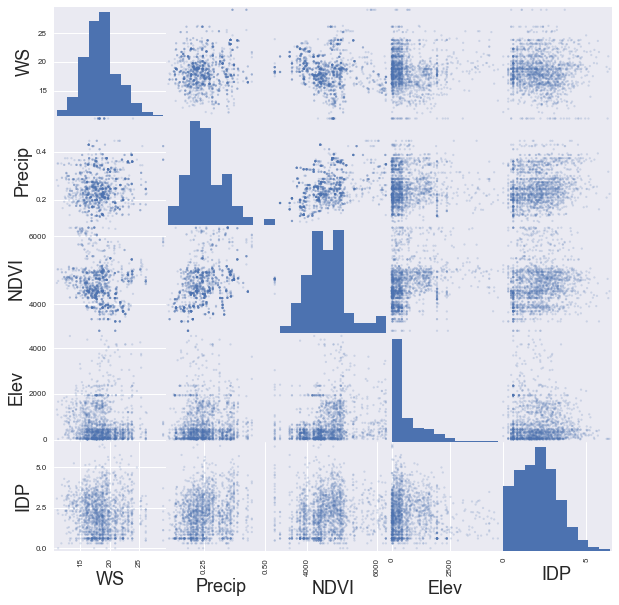

In [48]:
climscatter = pd.plotting.scatter_matrix(db2[["WS", "Precip", "NDVI", "Elev", "IDP"]], alpha=0.2, figsize=(10,10), s=20)
plt.savefig("./agu_plots/summary_histo_c.pdf")

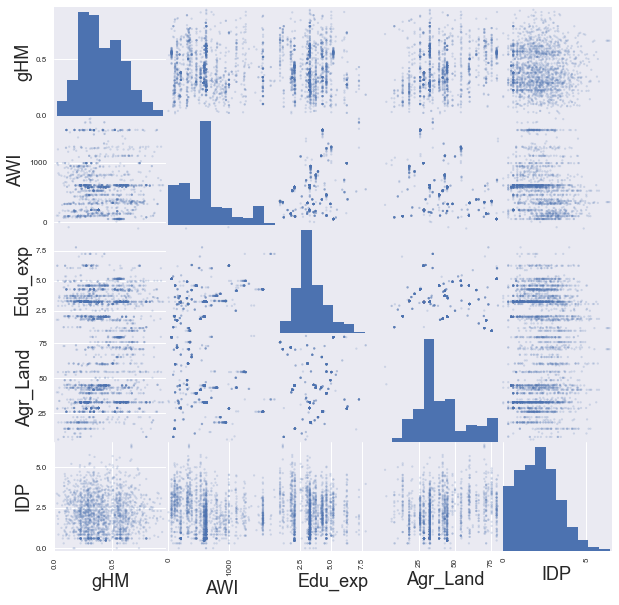

In [49]:
noclimscatter = pd.plotting.scatter_matrix(db2[[ "gHM", "AWI", "Edu_exp", "Agr_Land", "IDP"]], alpha=0.2, figsize=(10,10), s=20)
plt.savefig("./agu_plots/summary_histo_nc.pdf")

In [41]:
X_db = db2[db2.columns.drop('IDP')]

In [42]:
Y_db = db2["IDP"]

In [43]:
features = list(X_db.columns)

In [44]:
scaler = StandardScaler()
scaler.fit(X_db)
X_n = scaler.transform(X_db)

In [45]:
features

['WS', 'Precip', 'NDVI', 'gHM', 'AWI', 'Elev', 'Agr_Land', 'Edu_exp']

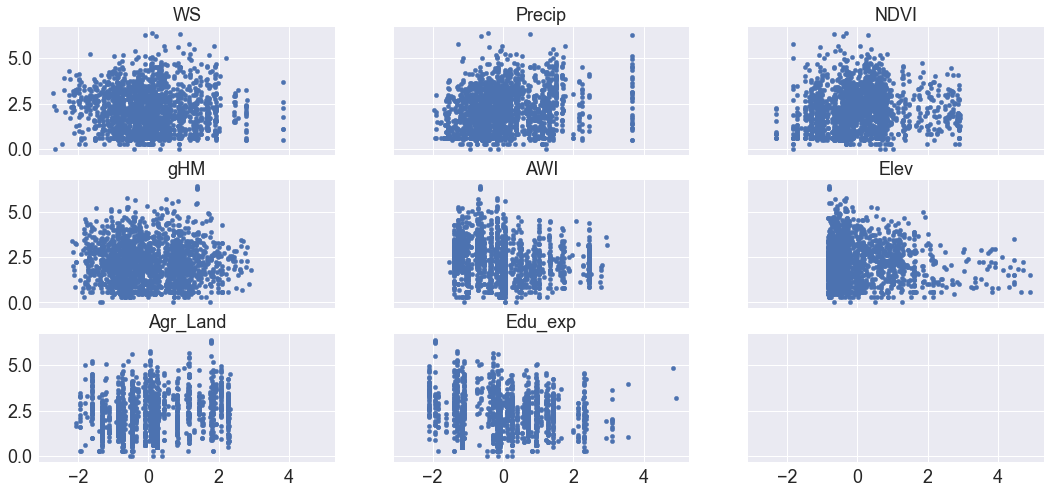

In [45]:
_, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(18,8))
r, c = 0, 0
for i in range(X_n.shape[1]):
    r, c = int(i/3), int(i%3)
    ax[r][c].scatter(X_n[:,i], Y_db, s=20)
    ax[r][c].set_title(features[i])

In [46]:
binning = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
Y_bin = binning.fit_transform(np.array(Y_db.tolist()).reshape(-1, 1)).flatten()

## Bootstrap to evaluate a RF model

In [175]:
c = np.zeros(X_n.shape[1])
r = []
rtr = []
mtr = []
restr = []
m = []
fi = np.zeros(X_n.shape[1])
res = []
rb = 0
m0 = []
ovr = []
ov = 100
idb = 0


for b in range(10000):
    # print("Boostr num. ", b)
    indices = np.arange(X_n.shape[0])
    X_tr, X_te, Y_tr, Y_te, idxtr, idxte = train_test_split(X_n, Y_db, indices, test_size=0.3, random_state=b, stratify=Y_bin)
    #m2 = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=22, min_samples_split=18, min_samples_leaf=14, max_depth=9, random_state=2, max_features=10)
    #m1 = RandomForestRegressor(max_depth=9, n_estimators=30, criterion="mse", min_samples_split=6, max_features=8, random_state=2)
    #m1 = RandomForestRegressor(max_depth=6, n_estimators=40, criterion="mse", min_samples_split=4, max_features=3, random_state=2)
    m1 = RandomForestRegressor(max_depth=6, n_estimators=40, criterion="mse", min_samples_split=4, max_features=3, random_state=2)
    m1.fit(X_tr, Y_tr)
    # print("R^2 = ", m1.score(X_te, Y_te))
    # print("Overfitting perc = ", 100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr)))
    ovr.append(100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr)))
    r.append(m1.score(X_te, Y_te))
    rtr.append(m1.score(X_tr, Y_tr))
    mse = 0
    mse0 = 0
    Y_pred = m1.predict(X_te)

    for i in range(len(Y_pred)):
        mse += (Y_pred[i] - list(Y_te)[i])**2
        res.append(Y_pred[i] - list(Y_te)[i])
        mse0 += (np.mean(list(Y_te))-list(Y_te)[i])**2
    # print("MSE = ", mse)
    # print("MSE base = ", mse0)
    m.append(mse/len(Y_pred))
    m0.append(mse0/len(Y_pred))

    Y_predtr = m1.predict(X_tr)
    msetr = 0
    for i in range(len(Y_predtr)):
        msetr += (Y_predtr[i]-list(Y_tr)[i])**2
        restr.append(Y_predtr[i]-list(Y_tr)[i])
    mtr.append(msetr/len(Y_predtr))
    
    if 100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr)) < ov and 100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr)) > 0:
        Xtrb = X_tr
        X_teb = X_te
        Y_teb = Y_te
        Y_trb = Y_tr
        rb = m1.score(X_te, Y_te)
        mb = m1
        ov = 100*(1-m1.score(X_te, Y_te)/m1.score(X_tr, Y_tr))
        idb = idxte
        

In [176]:
mb.score(Xtrb, Y_trb)

0.4428564960085162

In [177]:
rb

0.397786999194762

In [195]:
print('Mean residuals:', np.std(res))

Mean residuals: 0.9478831377493959


In [179]:
print('Mean RMSE:', np.std(np.sqrt(m)))

Mean RMSE: 0.02002221383418512


In [189]:
print('Mean R2 score:', np.mean(r))

Mean R2 score: 0.3094685290775235


In [181]:
print('Mean overfitting:', np.mean(ovr), '%')

Mean overfitting: 34.9276274502285 %


In [296]:
#import joblib
#filename = './agu_plots/rf_best.joblib.pkl'
#_ = joblib.dump(mb, filename, compress=9)

In [182]:
idcl = []
idcl.append(features.index("WS"))
idcl.append(features.index("Precip"))
idncl = list(set(range(len(features)))-set(idcl))

In [183]:
rncl = []
mncl = []
resncl = []

for b in range(10000):
    indices = np.arange(X_n.shape[0])
    X_tr, X_te, Y_tr, Y_te, idxtr, idxte = train_test_split(X_n[:,idncl], Y_db, indices, test_size=0.3, random_state=b, stratify=Y_bin)
    m1 = RandomForestRegressor(max_depth=6, n_estimators=40, criterion="mse", min_samples_split=4, max_features=3, random_state=2)
    m1.fit(X_tr, Y_tr)
    rncl.append(m1.score(X_te, Y_te))
    mse = 0
    Y_pred = m1.predict(X_te)

    for i in range(len(Y_pred)):
        mse += (Y_pred[i] - list(Y_te)[i])**2
        resncl.append(Y_pred[i] - list(Y_te)[i])
    mncl.append(mse/len(Y_pred))


In [193]:
print('Mean residuals, no climate:', np.mean(resncl))

Mean residuals, no climate: 0.0016257782011608124


In [191]:
print('Mean MSE, no climate:', np.mean(np.sqrt(mncl)))

Mean MSE, no climate: 0.9580176073819854


In [190]:
print('Mean R2 score, no climate:', np.mean(rncl))

Mean R2 score, no climate: 0.2942764607294472


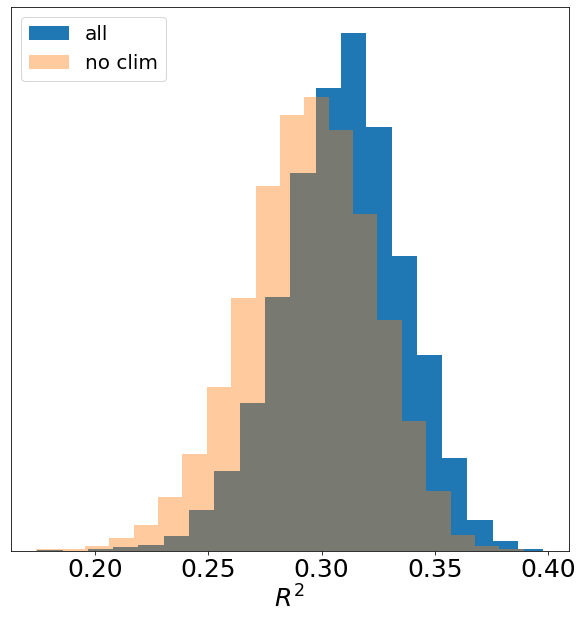

In [187]:
plt.figure(figsize=(10,10))
plt.hist(r, bins=20, density=True, label= "all")
plt.yticks([])
plt.hist(rncl, bins=20, density = True, label="no clim", alpha=0.4)
plt.yticks([])
plt.xlabel("$R^2$")
plt.legend(loc = "upper left")
plt.savefig("./agu_plots/r_nocl.pdf")

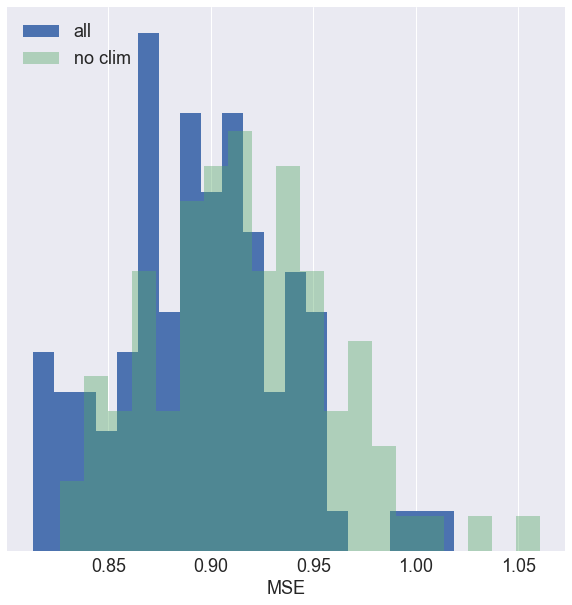

In [74]:
plt.figure(figsize=(10,10))
plt.hist(m, bins=20,density=True, label= "all")
plt.yticks([])
plt.hist(mncl, bins=20, density = True, label = "no clim", alpha = 0.4)
plt.yticks([])
plt.xlabel("MSE")
plt.legend(loc = "upper left")
plt.savefig("./agu_plots/mse_nocl.pdf")

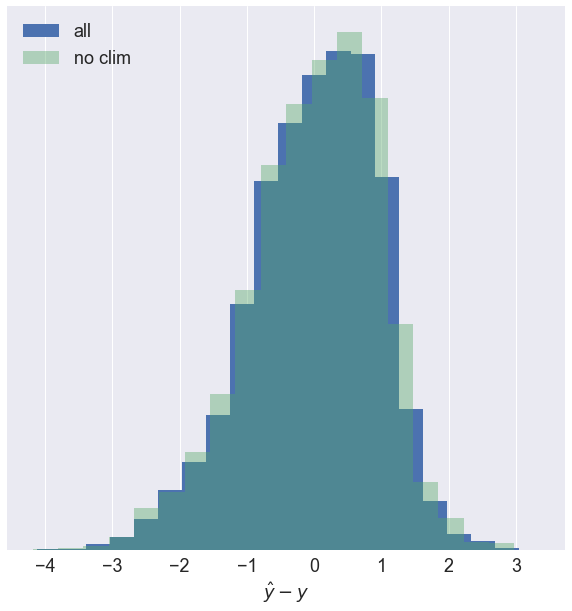

In [75]:
plt.figure(figsize=(10,10))
plt.hist(res, bins=20,density=True, label= "all")
plt.yticks([])
plt.hist(resncl, bins=20, density = True, label = "no clim", alpha = 0.4)
plt.yticks([])
plt.xlabel("$\hat{y} - y$")
plt.legend(loc = "upper left")
plt.savefig("./agu_plots/res_nocl.pdf")

## Linear models

In [76]:
df = pd.DataFrame([], columns=['group', 'WS', 'Precip', 'NDVI', 'gHM', 'AWI', 'Elev'])
coeff_list = []
for c in db1[db1["continent"]=="Asia"]["country_name"].unique():
    db3 = db2.loc[db1[db1["country_name"]==c].index]
    if len(db3)>15:
        print("Country : ", c)
        db3 = db3.drop(['Agr_Land','Edu_exp'], axis=1)
        X_db = db3[db3.columns.drop('IDP')]
        Y_db = db3["IDP"]
        scaler = StandardScaler()
        scaler.fit(X_db)
        X_n = scaler.transform(X_db)
        reg = LinearRegression().fit(X_n, Y_db)
        print("Train score =", reg.score(X_n, Y_db))
        print(reg.coef_)
        coeff_list.append({'group': c, 'WS': np.abs(reg.coef_[0]), 'Precip':np.abs(reg.coef_[1]), 
                           'NDVI': np.abs(reg.coef_[2]), 'gHM': np.abs(reg.coef_[3]), 
                           'AWI': np.abs(reg.coef_[4]), 'Elev': np.abs(reg.coef_[5])})

Country :  Viet Nam
Train score = 0.19334839275354243
[ 0.49274366  0.01610105 -0.18259912  0.08671143  0.15648612  0.13998968]
Country :  Indonesia
Train score = 0.027012089939687733
[ 0.00558831  0.06904278  0.0718804  -0.07546635 -0.00426585 -0.01882516]
Country :  Sri Lanka
Train score = 0.15375251025528736
[ 0.35900794  0.02453666 -0.13739418 -0.0815529   0.13843543 -0.04453727]
Country :  Philippines
Train score = 0.4316067388067737
[ 0.40964168 -0.0563382  -0.35798271 -0.15506106  0.45200266  0.12331429]
Country :  Malaysia
Train score = 0.037144791404294164
[ 0.0471996   0.04714711 -0.04731328 -0.09369915 -0.00228026 -0.03403627]
Country :  Thailand
Train score = 0.21736439084143355
[ 0.07860709  0.25697205 -0.11703982  0.37256605  0.20286944  0.16918922]
Country :  India
Train score = 0.2646989737622494
[ 0.47465813  0.17023634  0.09484133  0.07685661 -0.22292588 -0.52576558]
Country :  Bangladesh
Train score = 0.1725682232900363
[ 0.23962118  0.64486812 -0.12125293  0.2637789

In [77]:
df = df.append(coeff_list)
df

,group,WS,Precip,NDVI,gHM,AWI,Elev
0,Viet Nam,0.492744,0.016101,0.182599,0.086711,0.156486,0.139990
1,Indonesia,0.005588,0.069043,0.071880,0.075466,0.004266,0.018825
2,Sri Lanka,0.359008,0.024537,0.137394,0.081553,0.138435,0.044537
3,Philippines,0.409642,0.056338,0.357983,0.155061,0.452003,0.123314
4,Malaysia,0.047200,0.047147,0.047313,0.093699,0.002280,0.034036
5,Thailand,0.078607,0.256972,0.117040,0.372566,0.202869,0.169189
6,India,0.474658,0.170236,0.094841,0.076857,0.222926,0.525766
7,Bangladesh,0.239621,0.644868,0.121253,0.263779,0.181129,0.301692
8,Nepal,0.123686,0.230363,0.114208,0.282206,0.057810,0.298994


## Polar plot of category features for Bangladesh

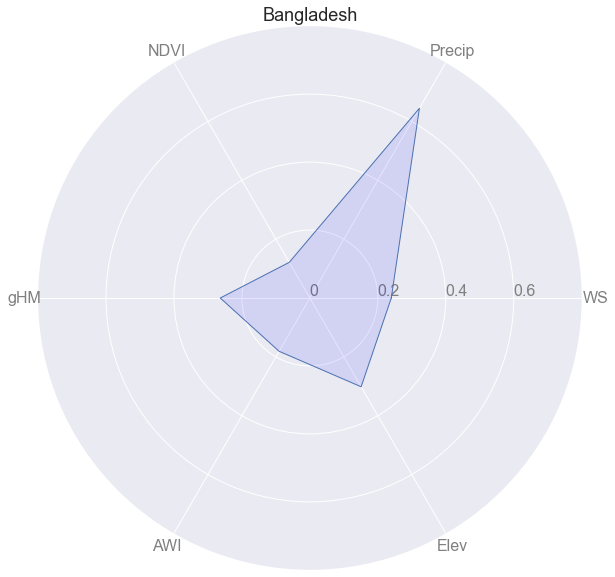

In [84]:
categories = list(df)[1:]
N = len(categories)
# values = df.loc[7].drop('group').values.flatten().tolist()  # must use iloc rather than loc
values = df.iloc[7].drop('group').values.flatten().tolist()
angles = [n / float(N) * 2 * pi for n in range(N)]
# Repeat first value at the end for the polar plot
values += values[:1]
angles += angles[:1]


plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.title("Bangladesh")
plt.xticks(angles[:-1], categories, color='grey', size=16)
ax.set_rlabel_position(0)
plt.yticks([0,0.2,0.4, 0.6], ["0","0.2","0.4", "0.6"], color="grey", size=16)
plt.ylim(0,0.8)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
plt.savefig("./agu_plots/chart_Bangladesh.pdf")
plt.show()

# SHAP Feature Explainer

In [196]:
X_trdb = pd.DataFrame(np.concatenate((Xtrb, X_teb)))

In [197]:
X_trdb.columns = features

In [198]:
config = {
    "model": mb,
    "X": X_trdb, 
    "features": features,
    "type": "regressor",
    "predictor": 'AWI',
    "Xtest": X_trdb, 
    "instance": 0,
    "plot": ["local", "waterfall"], 
    "path": "./agu_plots/shap1.pdf"
}

In [199]:
sp = Shap(config)
explainer, shapley, _, _ = sp.fit()

Instance number :  baseline
WS  =  -0.0753871374774682
Precip  =  -0.1638273216649196
NDVI  =  -0.11372857901536446
gHM  =  -0.17556659607946265
AWI  =  -0.009206336156299356
Elev  =  -0.3909526211323493
Agr_Land  =  -0.45202634345617504
Edu_exp  =  -0.1397744011847175


Exact explainer: 1910it [00:22, 51.19it/s]                           


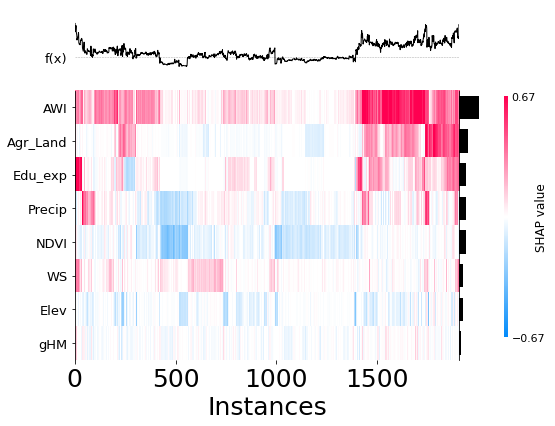

In [200]:
sp.plot(explainer, shapley, ["global", "heatmap"], 0)

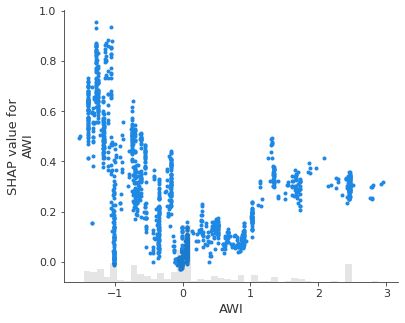

In [201]:
sp.plot(explainer, shapley, ["global", "scatter"], 0)

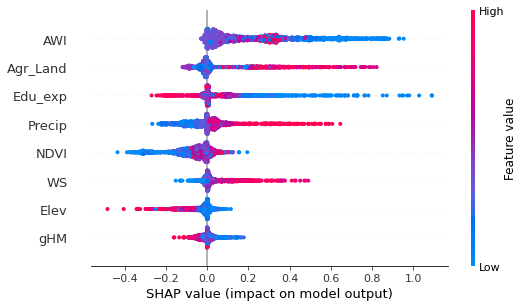

In [202]:
sp.plot(explainer, shapley, ["global", "summary"], 0)

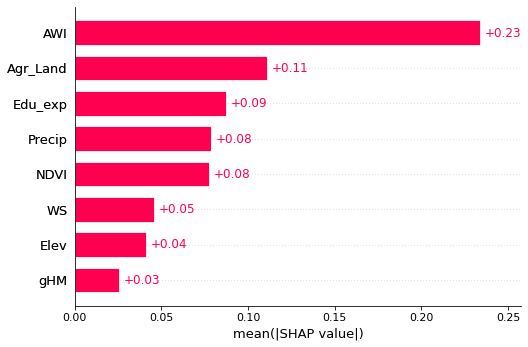

In [203]:
sp.plot(explainer, shapley, ["global", "bar"], 0)

In [204]:
mshap = np.mean(np.abs(shapley.values), axis=0)

In [205]:
order = (-mshap).argsort()
ranks = order.argsort()

In [206]:
ranks = list(ranks)

In [207]:
ranks

[5, 3, 4, 7, 0, 6, 1, 2]

In [208]:
idx = [ranks.index(i) for i in range(len(features))]

In [209]:
print(features)

['WS', 'Precip', 'NDVI', 'gHM', 'AWI', 'Elev', 'Agr_Land', 'Edu_exp']


In [210]:
[features[ranks.index(i)] for i in range(len(features))]

['AWI', 'Agr_Land', 'Edu_exp', 'Precip', 'NDVI', 'WS', 'Elev', 'gHM']

In [211]:
sorted_data = shapley.data[:,idx ]
sorted_shap = shapley.values[:,idx]
attribution_column_names = ["Shap_" + x for x in features]
sorted_attribution_column_names = [attribution_column_names[ranks.index(i)] for i in range(len(features))]
sorted_features = [features[ranks.index(i)] for i in range(len(features))]

In [212]:
melted_features = pd.melt(pd.DataFrame(sorted_data, columns=sorted_features),
                              value_vars=sorted_features,
                              var_name="Feature_name", value_name="Feature_value")

melted_attributions = pd.melt(pd.DataFrame(sorted_shap, 
                                  columns=sorted_attribution_column_names),
                              value_vars=sorted_attribution_column_names,#df_attributions.columns,
                              var_name="Feature_name", 
                              value_name="Attribution_value")

df_melted = melted_features.copy()
df_melted["Attribution_value"] = melted_attributions.Attribution_value 

In [72]:
font_size = 25
plt.rc('axes', titlesize=font_size)   # title
plt.rc('axes', labelsize=font_size)   # x and y labels
plt.rc('xtick', labelsize=font_size)  # x tick labels
plt.rc('ytick', labelsize=font_size)  # y tick labels
plt.rc('legend', fontsize=font_size)  # legend

In [73]:
plt.rcParams["axes.labelsize"] = 25

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


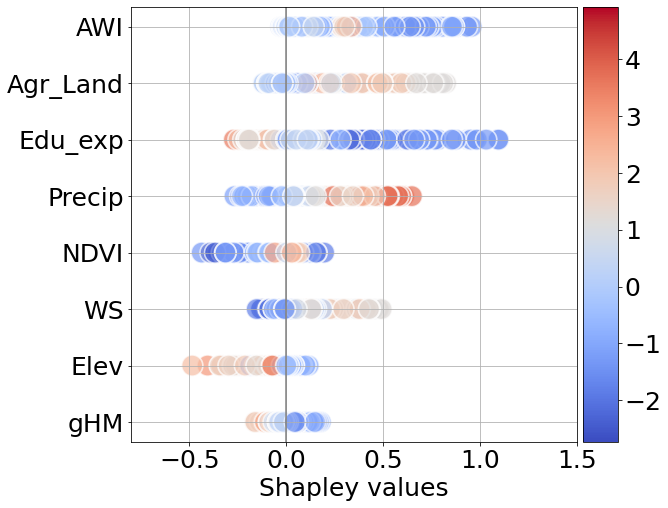

In [322]:
palette = sns.color_palette("coolwarm", as_cmap=True)

fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(nrows=1,
                       ncols=1, 
                       figure=fig,
                       width_ratios=[1],
                       height_ratios=[1],
                       wspace=0.1,
                       hspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
g = sns.scatterplot(data=df_melted,
                           x="Attribution_value",
                           y="Feature_name",
                           hue="Feature_value",
                           palette=palette,
                           s=450, alpha=0.7,
                           ax=ax1, legend='brief')
ax1 = g.axes
ax1.axvline(0, color="grey")
g.set(xlabel="Shapley values", ylabel="",  xlim=(-0.8,1.5))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.legend([],[], frameon=False)
plt.grid()

norm = plt.Normalize(X_trdb.min().min(), X_trdb.max().max())
cmap = palette
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cax = fig.add_axes([ax1.get_position().x1+0.01, ax1.get_position().y0, 0.06, ax1.get_position().height])
ax1.figure.colorbar(sm, cax=cax)
plt.tight_layout()
plt.savefig('./agu_plots/allshap_v2.pdf', bbox_inches='tight', format='pdf', transparent=False, dpi=1100)
plt.ioff()

In [213]:
arr_data = scaler.inverse_transform(shapley.data)

In [214]:
features

['WS', 'Precip', 'NDVI', 'gHM', 'AWI', 'Elev', 'Agr_Land', 'Edu_exp']

In [278]:
arr_data[:,3].max()

0.9391740647705376

(array([ 57., 138., 396., 385., 258., 289., 210., 100.,  54.,  22.]),
 array([0.02132943, 0.11311389, 0.20489836, 0.29668282, 0.38846728,
        0.48025175, 0.57203621, 0.66382067, 0.75560514, 0.8473896 ,
        0.93917406]),
 <BarContainer object of 10 artists>)

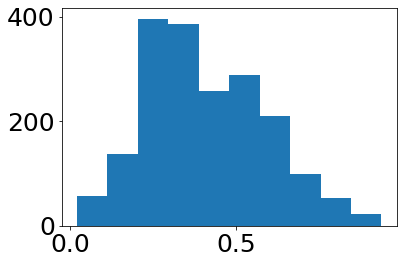

In [279]:
plt.hist(arr_data[:,3])

In [216]:
plt.rc('legend', fontsize=20)  # legend

In [288]:
split_var = 'Agr_Land'
feature_name = 'Precip'
feature_indx = features.index(feature_name)
df = pd.DataFrame(arr_data[:, feature_indx], columns=[feature_name])
df[split_var] = arr_data[:,features.index(split_var)]
df['SHAP'] = shapley.values[:, feature_indx]

In [289]:
df.head()

,Precip,Agr_Land,SHAP
0,0.111634,32.809255,-0.158323
1,0.353149,41.721166,0.066291
2,0.205915,32.809255,-0.141062
3,0.272204,44.825306,0.027550
4,0.372599,79.166667,0.326451


In [219]:
#df.to_csv("./agu_plots/ws.csv") 

In [220]:
#pd.read_csv("./agu_plots/ws.csv") 

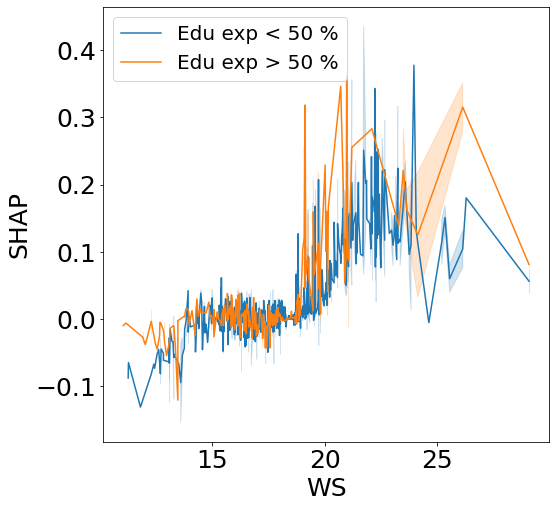

In [332]:
thr=50
split_var = 'Agr_Land'
feature_name = 'WS'
feature_indx = features.index(feature_name)
df = pd.DataFrame(arr_data[:, feature_indx], columns=[feature_name])
df[split_var] = arr_data[:,features.index(split_var)]
df['SHAP'] = shapley.values[:, feature_indx]
df1 = df[df[split_var]<thr]
df2 = df[df[split_var]>thr]

fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(nrows=1,
                       ncols=1, 
                       figure=fig,
                       width_ratios=[1],
                       height_ratios=[1],
                       wspace=0.1,
                       hspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])

g = sns.lineplot(x=feature_name, y="SHAP", data=df1, label="Edu exp < "+str(thr)+" %", ci='sd')
g = sns.lineplot(x=feature_name, y="SHAP", data=df2, label="Edu exp > "+str(thr)+" %", ci='sd')


#g.set_title("Feature value and model's predictions for " + feature_name)
plt.legend(loc="upper left")
#plt.savefig("./agu_plots/precip_elev_v0.pdf")

In [333]:
df1

,WS,Agr_Land,SHAP
0,17.988128,32.809255,0.028529
1,19.730616,41.721166,0.207657
2,19.737663,32.809255,0.013588
3,19.739319,44.825306,0.006365
6,17.824309,39.248987,0.006051
...,...,...,...
1902,21.737931,41.721166,0.425750
1903,17.858050,26.087354,-0.008239
1905,15.633464,39.248987,0.030367
1906,14.975836,22.217748,-0.008098


In [334]:
from itertools import groupby
from scipy.signal import savgol_filter

In [335]:
x = df1["WS"].sort_values()
y = df1["SHAP"][x.index]

In [336]:
x2 = df2["WS"].sort_values()
y2 = df2["SHAP"][x2.index]

In [337]:
xy = pd.DataFrame(list(zip(x,y)), columns=["x","y"]).groupby(['x'], as_index=False).mean()

In [338]:
xy1 = pd.DataFrame(list(zip(x2,y2)), columns=["x","y"]).groupby(['x'], as_index=False).mean()

In [339]:
x1 = np.array(xy.x)
y1 = np.array(xy.y)
x3 = np.array(xy1.x)
y3 = np.array(xy1.y)

In [357]:
yhat = savgol_filter(y1, 101, 3) # window size 51, polynomial order 
yhat1 = savgol_filter(y3, 101, 3) # window size 51, polynomial order 

-0.049984911256037795


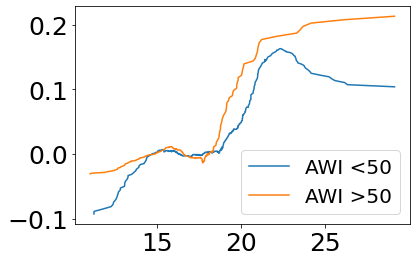

In [358]:
print(max(yhat)-max(yhat1))
plt.plot(x1, yhat, label="AWI <"+str(thr))
plt.plot(x3, yhat1, label="AWI >"+str(thr))
plt.legend()
plt.show()

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


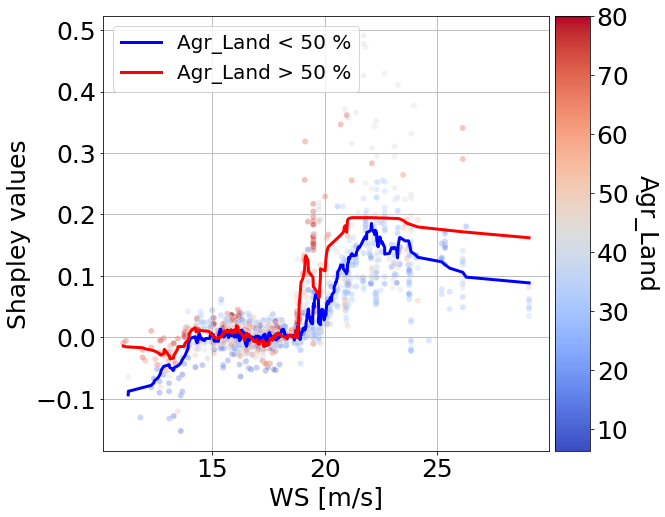

In [350]:
feature_name = 'WS'
feature_indx = features.index(feature_name)
df = pd.DataFrame(arr_data[:, feature_indx], columns=[feature_name + " [m/s]"])
df['Agr_Land'] = arr_data[:,features.index('Agr_Land')]
df['Shapley values'] = shapley.values[:, feature_indx]

fig = plt.figure(figsize=(8, 8))

gs = gridspec.GridSpec(nrows=1,
                       ncols=1, 
                       figure=fig,
                       width_ratios=[1],
                       height_ratios=[1],
                       wspace=0.1,
                       hspace=0.4)

ax1 = fig.add_subplot(gs[0, 0])
palette = sns.color_palette("coolwarm", as_cmap=True)

g = sns.scatterplot(data=df, x=feature_name + " [m/s]", y="Shapley values", hue="Agr_Land", palette=palette, alpha=0.35, legend = False)

#g.set_title("Feature value and model's predictions for " + feature_name)
plt.plot(x1, yhat, label="Agr_Land < "+str(thr) +" %", color="blue", linewidth=3.0)
plt.plot(x3, yhat1, label="Agr_Land > "+str(thr) + " %", color="red", linewidth=3.0)
plt.legend(loc="upper left")
plt.grid()

norm = plt.Normalize(df['Agr_Land'].min(), df['Agr_Land'].max())
cmap = palette
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cax = fig.add_axes([ax1.get_position().x1+0.01, ax1.get_position().y0, 0.06, ax1.get_position().height])
ax1.figure.colorbar(sm, cax=cax)
cax.set_ylabel('Agr_Land', rotation=270, labelpad=30)
plt.tight_layout()
plt.savefig('./agu_plots/Agri_WS_v2.png', bbox_inches='tight', format='png', transparent=False, dpi=1100)


plt.ioff()

# Partial dependency

In [93]:
config = {
    "model": mb,
    "method": "PDP",
    "instance": [0],
    "X": Xtrb, 
    "features": features,
    "predictor": 'AWI', 
    "type": "predict",
    "decimal": 2,
    "nsample": 1000,
    "path": "./agu_plots/pdp_AWI.pdf"
}

In [94]:
pdep = PDP(config)
ypartial = pdep.fit()

Estimating  AWI  PDP with  175  samples!


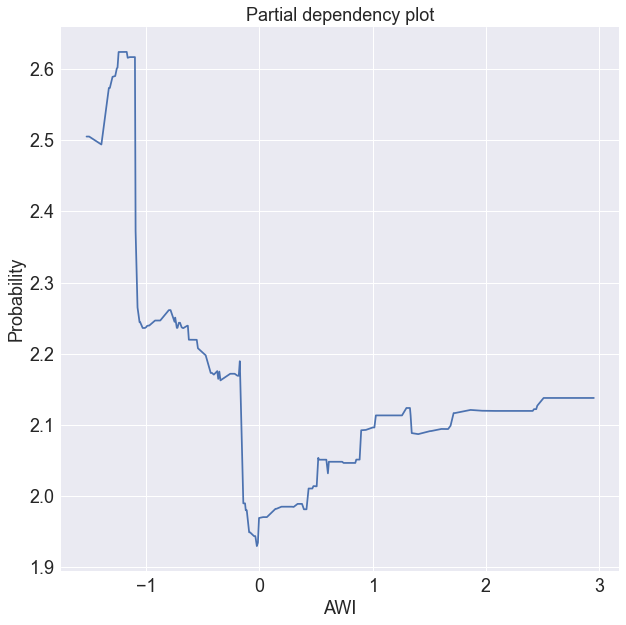

In [95]:
pdep.plot(ypartial)

In [96]:
def unique_values(X, feat, decimal):
    """ Keep only values of a given feature, feat, thereby reducing the dataset X """
    _, Xred = npi.group_by(np.array(X)[:,feat].round(decimals=decimal)).min(np.array(X))
    return Xred

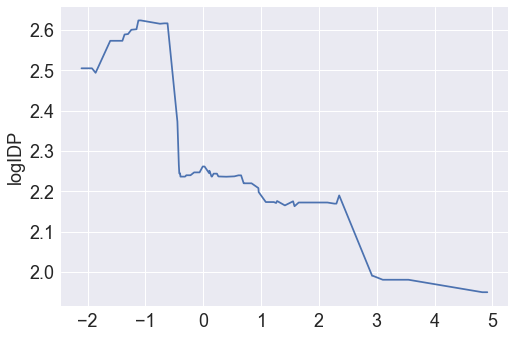

In [107]:
Xred = unique_values(Xtrb,7,2) 
x, y = list(zip(*sorted(zip(Xred[:,7], ypartial))))
plt.plot(x, y)
plt.ylabel("logIDP")
plt.savefig("./agu_plots/pdp_AWI.pdf")
plt.show()

# Feature permutation

In [108]:
config = {
    "model": mb,
    "X": np.concatenate((Xtrb, X_teb)), 
    "y": np.concatenate((Y_trb, Y_teb)),
    "type": "predict",
    "features": features,
    "Np": 200,
    "cost": "mse", 
    "path": "./agu_plots/perm.pdf"
}

In [109]:
fp = FeaturePermutation(config)
fi = fp.fit()

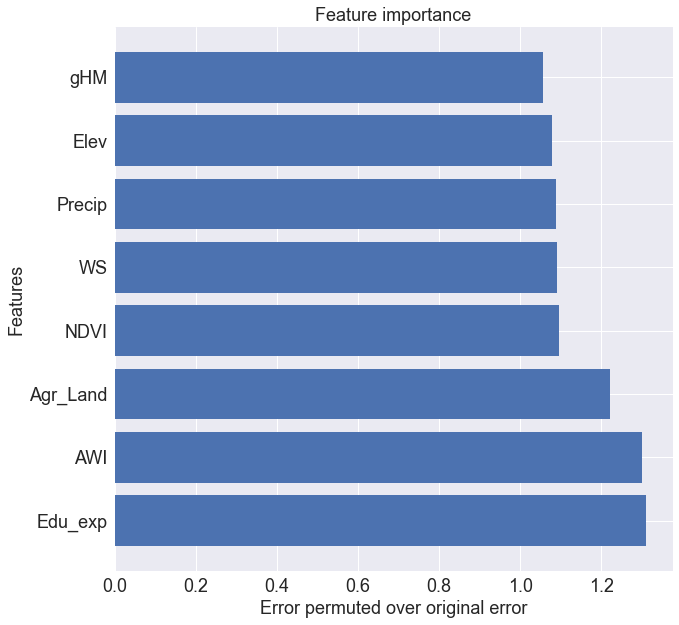

In [110]:
fp.plot(fi["RESULT"])

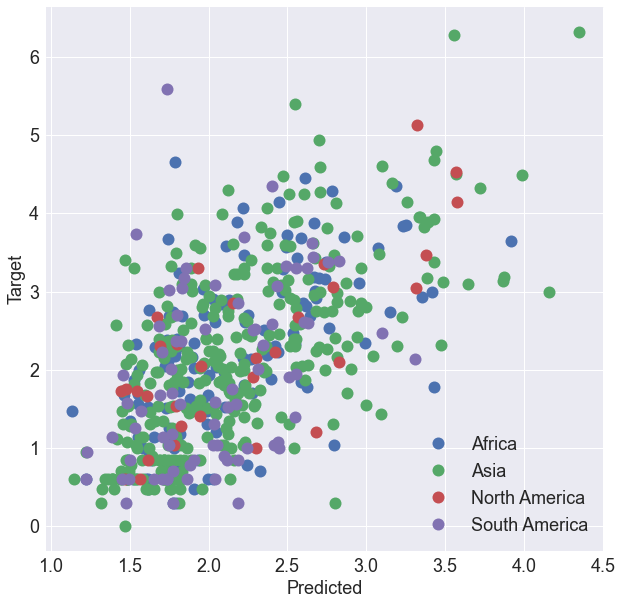

In [111]:
df = pd.DataFrame(dict(x=mb.predict(X_teb), y=Y_teb, label=list(db1["continent"].iloc[idxte])))
groups = df.groupby('label')
# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()
ax.set_xlabel('Predicted')
ax.set_ylabel('Target')
plt.savefig("./agu_plots/pred_continent.pdf")
plt.show()

In [112]:
fi = mb.feature_importances_

In [113]:
fi, fif = list(zip(*sorted(list(zip(mb.feature_importances_,features)), reverse=True)))

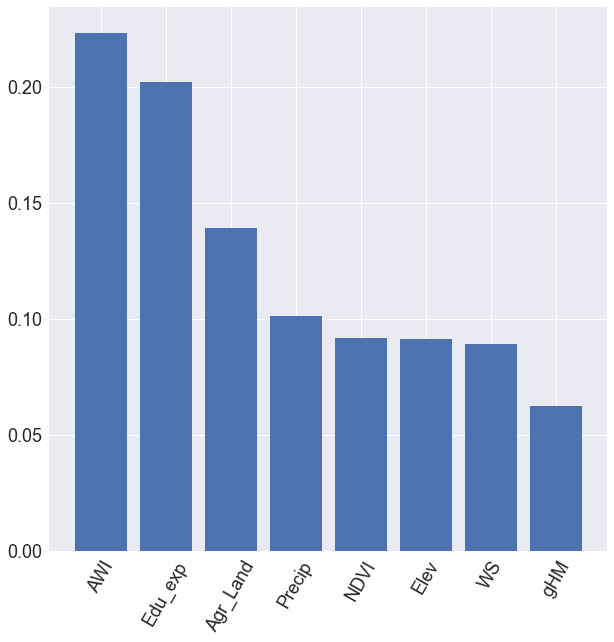

In [114]:
plt.figure(figsize=(10,10))
plt.bar(range(len(fi)), fi)
# Rotation of the bars names
plt.xticks(range(len(fi)), fif, rotation=60)
plt.savefig('./agu_plots/rf_score.pdf')

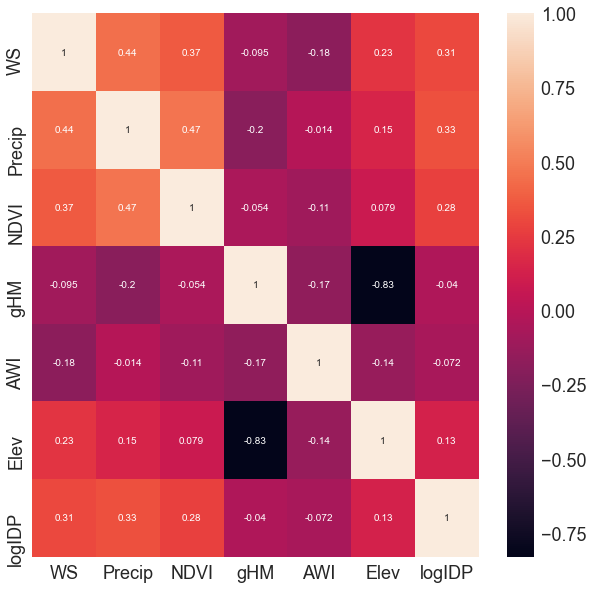

In [115]:
db_corr = X_db
db_corr["logIDP"] = Y_db
plt.figure(figsize=(10,10))
corrMatrix = db_corr.corr()
ax = sns.heatmap(corrMatrix, annot=True)
plt.savefig('./agu_plots/corr.pdf', bbox_inches='tight')